In [3]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cpu'

## Data prepairing and loading

Data can be almost anything.... in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some known data using linear regression formula.
We'll use a linear regression formula to make a straight line with known parameters.

In [4]:
import torch

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

### Splitting data into train and test

In [6]:
train_split = int(0.8 * len(X))
train_split

40

In [7]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    """
    Plots training data, test data and compares predicitons.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    # If there are any predictions, plot them too
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    # Show the legend
    plt.legend(prop={"size":14})

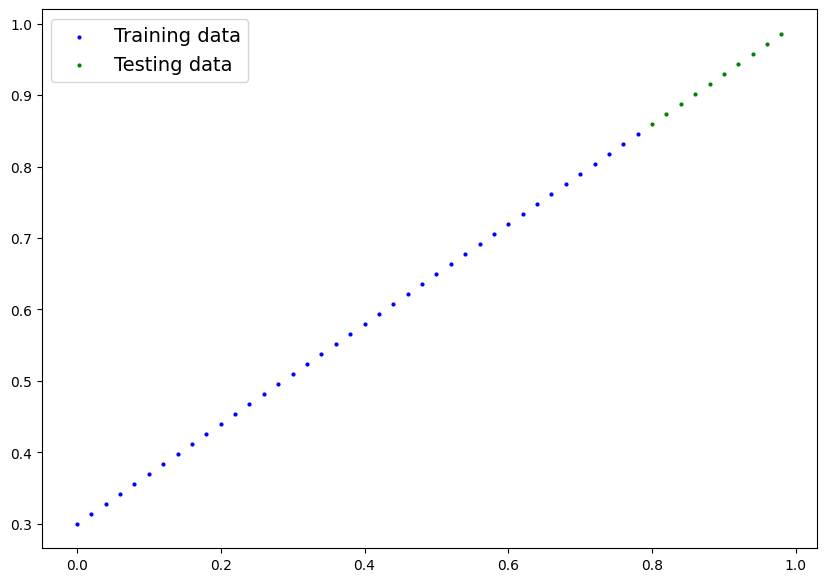

In [9]:
plot_predictions()

## Build first linear regression model

What our model does:
* Start with random values (weight&bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient Descent
2. Backpropagation 

In [14]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    # Forward method to define the computation in the model
    def forward(self, x:torch.Tensor)->torch.Tensor: # "x" is the input data
        return self.weights * x + self.bias # This is the linear regression formula
        

### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in forward computation

### Checking Pytorch Model Parameters

In [15]:
# create a random seed
torch.manual_seed(43)

# create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

In [16]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([-0.6484])), ('bias', tensor([-0.7058]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.
When we pass data through our model, it's going to run it through the `forward()` method.

In [17]:
# make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[-1.2246],
        [-1.2375],
        [-1.2505],
        [-1.2635],
        [-1.2764],
        [-1.2894],
        [-1.3024],
        [-1.3153],
        [-1.3283],
        [-1.3413]])

In [18]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

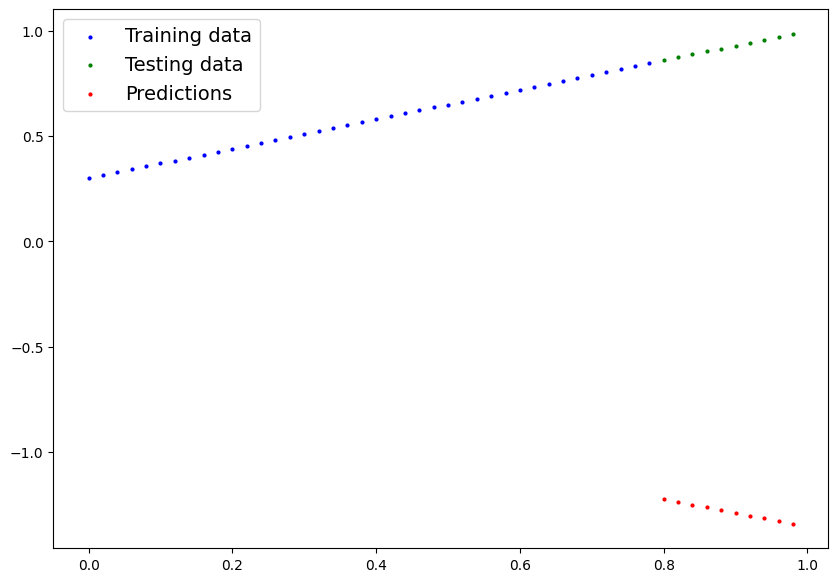

In [20]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for a model to move from some unknown parameters (these maybe random) to some know parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use loss function(cost function or criterion)

Things we need to train:
* Loss function: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* Optimizer: Takes into account the loss of a model and adjusts the model's parameters(e.g. weights and biases in our case) to  improve the loss function.

And specially for pytorch, we need:
* A training loop
* A testing loop

In [21]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.6484])), ('bias', tensor([-0.7058]))])